A. Durmus
A. Mazarguil

TP : Mathématiques statistiques et Apprentissage
# Rendu de Moussa EL OUAFI
# <center>                    Régression linéaire

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py
import seaborn as sns
from scipy.stats import norm
from sklearn import linear_model

import random
from numpy.linalg import inv
import numpy . random as rdm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#pip install latex

Une partie de cet énoncé est inspiré par un sujet proposé par Joseph Salmon.
Un rapport commenté et écrit avec Latex est éxigé, de plus le code est aussi à rendre.
La date limite est le 26 Mars midi et le rapport et le code sont à rendre sur le moodle du
cours.


# 1 Partie théorique




Voir **Régression_linéaire_Partie_Théorique.pdf\**

# 2 Partie pratique
Dans cette partie, on s’aidera de l’introduction à Panda et aux outils graphiques de
python pour les probabilités et les statistiques.


# 2.1 Implémentation de la méthode des moindres carrés

A partir de données réelles $(z_i)_{i∈{1,...,N}}$, les données centrées et normalisées $(z_i^n)_{i∈{1,...,N}}$
sont définies par

## 1. Il est courant de centrer et normaliser les colonnes de la matrice x. Expliquer pourquoi il est sensé de faire cela ?


###  Les variables mesurées différentes unités ne contribuent pas de manière égale à l'analyse de données et générer soufant un biais. Le bénéfit de centrer et normaliser les colonnes de la matrice $x$ est de rendre leurs valeurs comparables qui ne le seraient pas directement parce qu'elles ont des moyennes et ou des variances trop différentes.

## 2. Faites une fonction qui effectue cette tâche et la signature suivante.

In [ ]:
### Moyenne et Variance
def Mean(x):
  return np.mean(np.array(x))

def Var(x):
  return np.var(np.array(x))



def Norm_ligne(X):
  if Var(X)==0:
    return X
  else:
    return (np.array(X)-Mean(X))/(np.sqrt(Var(X)))

    ### On normalise les colonnes d'une matrice, Pour ce faire, on Normalise les ligne de sa transposé.

def normalize(X):
    Y= (np.array(X)).T ## on prend la transposé de la matrice X.
    Y.reshape(-1,1)
    Normal=[]
    if np.array(Y).shape==(Y.size,):            # on est dans le cas X est de shape (X.size,), donc on le considére comme ligne et on utilise Norm_ligne(X)
       Normal=Norm_ligne(Y)
    else:
      for i in range(Y.shape[0]):
        Normal.append(Norm_ligne(Y[i]))       ## Normalisation des lignes
    return np.array(Normal).T             ## Matrice dont les colonnes sont toutes normalisées.



## 3. Faites une fonction implémentant la méthode des moindres carrés avec la signature uivante. Cette fonction devra renvoyer l’estimateur βˆn et le vecteur des résidus définis par (2) et (3).

In [ ]:
def OLS (X ,y ,  option ='non - normalise') :
  if option =='non - normalise':  # non normalisé
    A= np.array(X)
    z= np.array(y)
    a= np.linalg.inv((np.dot(A.T, A)))
    c=np.dot(a,A.T)
    Beta=np.dot(c,z).reshape(X.shape[1],)
    K=np.eye(np.shape(X)[0]) - np.dot(A,c)
    epsilon = np.dot(K,z).reshape(y.size,)   ## we make sure that epsilon got the same shape as y.
  else:
    A= normalize(np.array(X))
    z= np.array(y)
    a= inv(np.dot(A.T, A))
    c=np.dot(a,A.T)
    Beta=np.dot(c,z)
    K=np.eye(np.shape(X)[0]) - np.dot(A,c)
    epsilon = np.dot(K,z)

  return Beta, epsilon

# 4. On considère les données suivantes.


In [ ]:
beta = np.array ([2 , 1 , 2.5])
X = np.array([[1 , 3 , 9] , [1 , 4 , 16] , [1 , 6, 36] , [1 , 5 , 25]])
y = X.dot( beta ) + 0.1* np.random.normal( size =4)
OLS(X,y)

(array([0.45526934, 1.71766405, 2.42267523]),
 array([-0.01320844,  0.03962532,  0.01320844, -0.03962532]))

Justifier que ces données sont associées au modèle
$$Y_i = β_1 + β_2x_i + β_3x_i^2 + \epsilon_i ,$$

où les $(\epsilon_i)_{i∈{1,2,3,4}}$ seront des variables aléatoires dont on précisera la loi. Vérifier
que votre implémentation est correcte sur ces données. On visualisera les données
considérées et la courbe de prédiction obtenue.


on remarque que $X.T[2]= X.T[1]{**2}$. Donc les données sont bien associées au modèle ci dessus.

In [ ]:
X.T[2]== X.T[1]**2

array([ True,  True,  True,  True])



### On vérifie que la fonction  OLS  fonctionne correctement on peut se mettre dans l'état statique ou le bruit  ϵ  est nul.

In [ ]:
##cas ou epsilon est nul.

beta = np.array ([2 , 1 , 2.5])
X = np.array([[1 , 3 , 9] , [1 , 4 , 16] , [1 , 6, 36] , [1 , 5 , 25]])
y = X.dot( beta )

beta.astype(np.float), OLS(X,y)[0]        ## on converti beta to float.

(array([2. , 1. , 2.5]), array([2. , 1. , 2.5]))

# 2.2 Expérience de Galton
On se propose ici d’utiliser les données étudiées par Sir Francis Galton 1
. Il tentait de
mettre en évidence pourquoi la taille des enfants de certaines familles était en moyenne
plus basse que la moyenne de l’ensemble des tailles observées 2
. Cela explique par ailleurs
l’introduction du terme “régression”. On ne centrera pas ni normalisera les données pour
cet partie.

## 1. Récupérer les données sur le moodle du cours et charger les. On convertira les tailles en cm et on arrondira au premier chiffre après la virgule. Ici la taille des individusest exprimée en pouce 1 pouce équivaut à 2.54 cm.

### Récupération des données

In [ ]:
from google.colab import files
ploaded = files.upload()

df =pd.read_csv('Galton.txt', sep = '\t')
df.head()

Saving Galton.txt to Galton.txt


,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


### Conversion et arrondissement au premier chifre après la virgule

In [ ]:
## il faut excuter le code une seule fois sinon la taille se multiplie par 2.54 olusieurs fois.
df['Height'] = round(df['Height']*2.54,1)
df['Mother'] = round(df['Mother']*2.54,1)
df['Father'] = round(df['Father']*2.54,1)
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,199.4,170.2,M,185.9,4
1,1,199.4,170.2,F,175.8,4
2,1,199.4,170.2,F,175.3,4
3,1,199.4,170.2,F,175.3,4
4,2,191.8,168.9,M,186.7,4


## 2. Quel est le nombre de données manquantes ? Enlever si besoin les lignes dont ils manquent des données.


### il n'y a pas des données manquantes.

In [ ]:
df.isnull().sum()  ##somme des données manquantes par chaque colonne

Family    0
Father    0
Mother    0
Gender    0
Height    0
Kids      0
dtype: int64

In [ ]:
df.isnull().sum().sum() ##somme des données manquantes dans toute la matrice

0

## 3. Afficher sur un même graphique l’histogramme de la taille des pères et des mères.On affichera aussi deux boxplots et un qq-plots. La taille des pères et des mères suivent-elles la même distribution ?

### Histogramme

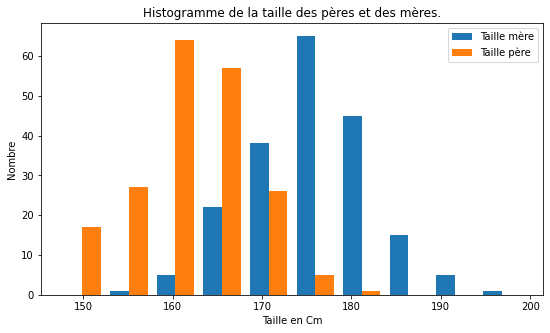

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


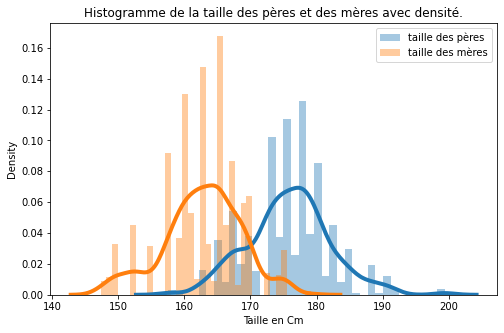

In [ ]:
f=df.groupby('Family').mean()['Father']  ### on élimine les répétition des tailles
m= df.groupby('Family').mean()['Mother']

plt.figure(figsize=[9,5])
plt.hist([f,m], label=['Taille mère', 'Taille père'])
plt.legend(loc='upper right')
plt.xlabel("Taille en Cm")
plt.ylabel('Nombre')
plt.title("Histogramme de la taille des pères et des mères.")
plt.show()

## Histogramme avec densité
plt.figure(figsize=[8,5])


sns.distplot(df["Father"], hist=True, kde=True, bins=int(180/5),kde_kws={'linewidth': 4}, label="taille des pères")
sns.distplot(df["Mother"], hist=True, kde=True, bins=int(180/5),kde_kws={'linewidth': 4}, label="taille des mères")
plt.title("Histogramme de la taille des pères et des mères avec densité.")
plt.xlabel("Taille en Cm")
plt.legend()
plt.show()


### Deux boxplots de donnée:

<Figure size 648x360 with 0 Axes>

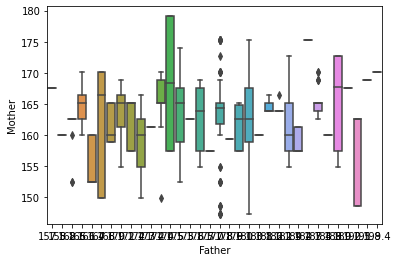

In [ ]:
plt.figure(figsize=[9,5])
fig , ax = plt . subplots ()
ax = sns . boxplot (x =df['Father'], y=df['Mother'],data = df )
fig . show ()

Text(0.5, 1.0, 'boxplot de la taille des pères et des mères.')

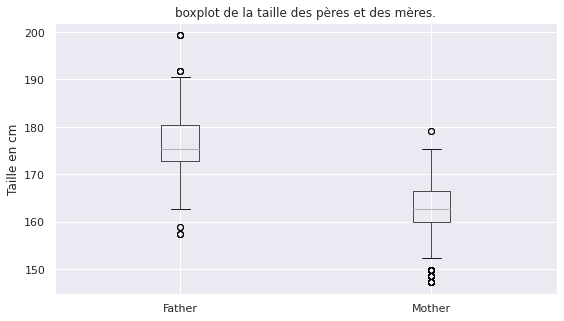

In [ ]:
plt.figure(figsize=[9,5])
sns.set(rc={'figure.figsize':(11.7,8.27)})
boxplot = df.boxplot(column=['Father', 'Mother'])
plt.ylabel("Taille en cm")
plt.title("boxplot de la taille des pères et des mères.")

### qq-plots

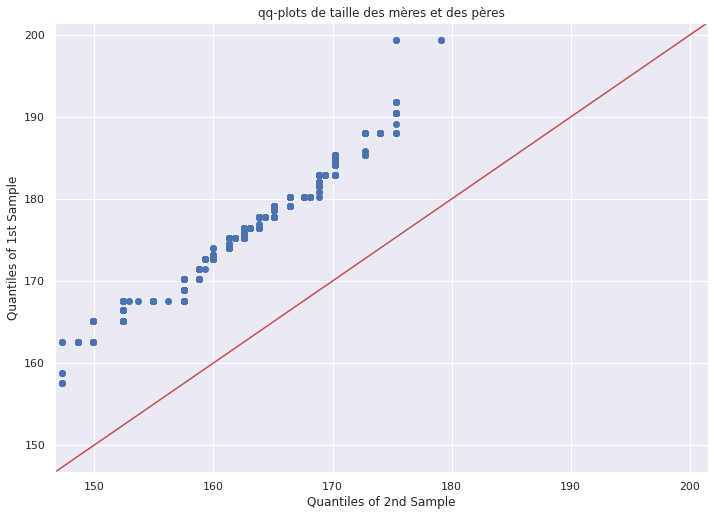

In [ ]:
pp_x = sm.ProbPlot (df['Father'])
pp_y = sm.ProbPlot (df['Mother'] )
fig = sm.qqplot_2samples (pp_x, pp_y, line="45")
plt.title("qq-plots de taille des mères et des pères")
fig.show ()

### la taille des pères et mères ne suivent pas la m^eme loi, en effet leur distrubitions n'ont pas le meme quantiles comme le montre la figure suivante.

## 4. Effectuer la même tâche en centrant et normalisant les données.

In [ ]:
### on crée on DataFrame "Father", "Mother" normalisée et non dupliquée (ie sans répétitions des tailles.)
df_dup=df.drop_duplicates(subset=['Family'],keep="first")
f=df.groupby('Family').mean()['Father']
m=df.groupby('Family').mean()['Mother']
DF= pd.DataFrame({'Father':f, 'Mother':m})
DF=normalize(DF) ## Normalisation
DF[:,0]
DF= pd.DataFrame({'Family': df_dup["Family"],'Father':DF[:,0], 'Mother':DF[:,1], "Kids": df_dup["Kids"]})
DF.head()                      ## "Father", "Mother" sont normalisées


,Family,Father,Mother,Kids
0,1,3.499647,1.286276,4
4,2,1.783859,0.649602,4
8,3,-0.127588,0.850657,2
10,4,-0.127588,1.152239,5
15,5,-0.127588,0.850657,6


### Histograme

après la Normalisation, les tailles des pères et des mères suivent une loi (quasi) normale.

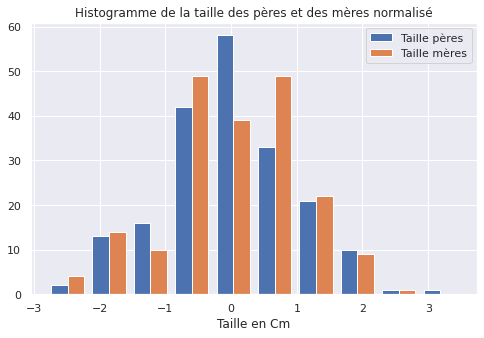

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

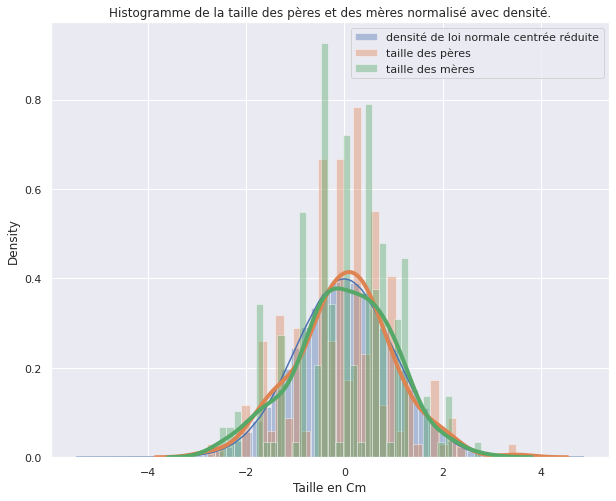

In [ ]:
plt.figure(figsize=[8,5])
plt.hist([DF['Father'], DF['Mother']], label=["Taille pères", 'Taille mères'])
plt.legend(loc='upper right')
plt.xlabel("Taille en Cm")
plt.title("Histogramme de la taille des pères et des mères normalisé")
plt.show()

## Histogramme avec densité densité
plt.figure(figsize=[10,8])
data = np.random.randn(1000000)
sns.distplot(data, label="densité de loi normale centrée réduite")
sns.distplot(DF['Father'], hist=True, kde=True, bins=int(180/5),kde_kws={'linewidth': 4}, label="taille des pères")
sns.distplot(DF['Mother'], hist=True, kde=True, bins=int(180/5),kde_kws={'linewidth': 4}, label="taille des mères")
plt.title("Histogramme de la taille des pères et des mères normalisé avec densité.")
plt.xlabel("Taille en Cm")
plt.legend()
plt.show()

### Deux boxplots:

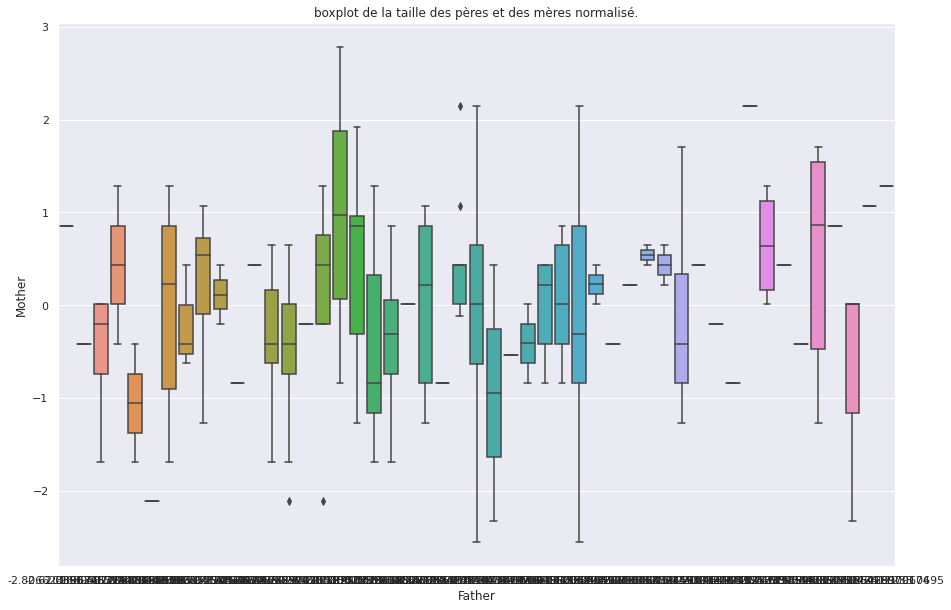

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
fig , ax = plt . subplots ()
ax = sns . boxplot (x =DF['Father'], y=DF['Mother'],data = DF )
plt.title("boxplot de la taille des pères et des mères normalisé.")
fig . show ()


Text(0.5, 1.0, 'boxplot de la taille des pères et des mères normalisé.')

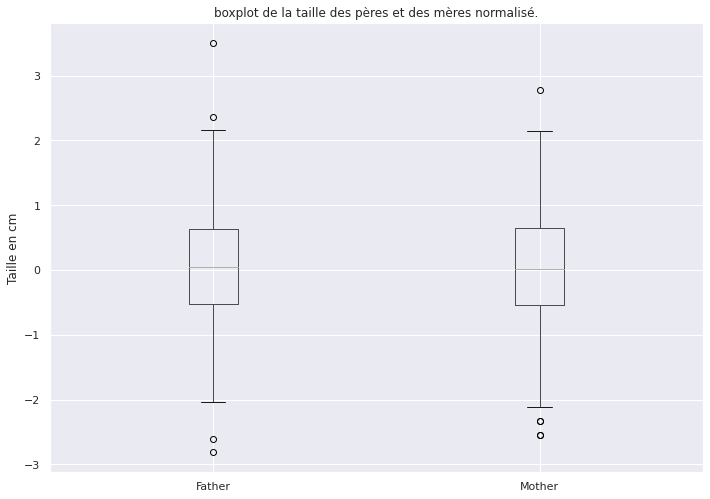

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
boxplot = DF.boxplot(column=['Father', 'Mother'])
plt.ylabel("Taille en cm")
plt.title("boxplot de la taille des pères et des mères normalisé.")

### qq-plots

<Figure size 576x360 with 0 Axes>

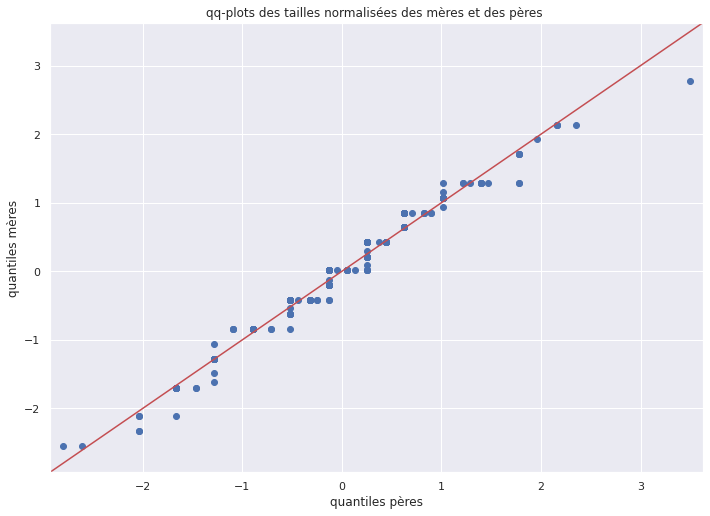

In [ ]:
plt.figure(figsize=[8,5])
pp_x = sm.ProbPlot(DF['Father'])
pp_y = sm.ProbPlot(DF['Mother'])
sm.qqplot_2samples(pp_y, pp_x,line='45')
plt.xlabel('quantiles pères')
plt.ylabel("quantiles mères")


plt.title('qq-plots des tailles normalisées des mères et des pères ')
plt.show()


### Après normalisation, La régression n'est pas parfaite mais la destrubition des tailles des mères et pères peuvent etre approchée par la meme loi.

## 5. Afficher un scatter plot des données et commenter.


- scatter plot  nous permet de réperer la corrélation entre les variables.
- après normalisation la distrubition des tailles de pères ose trouve dans le voisinage immédiatde leur taille moyenne.

### scatter plt sans normalisation:

No handles with labels found to put in legend.


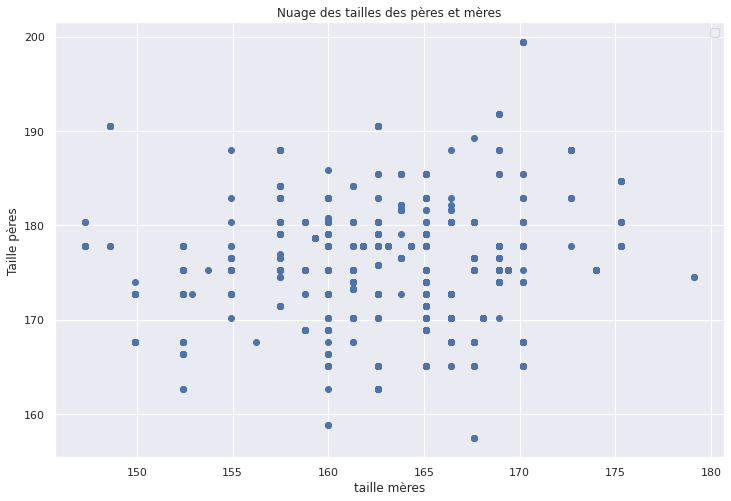

In [ ]:
## nuage taille père et mère
plt.figure(figsize = (12,8))
plt.scatter(x=df["Mother"], y=df["Father"])

plt.xlabel("taille mères")
plt.ylabel("Taille pères")
plt.legend()
plt.title("Nuage des tailles des pères et mères")
plt.show()

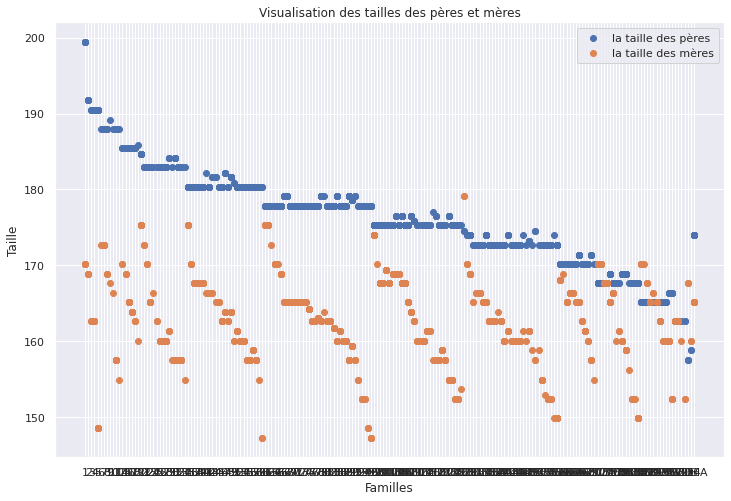

In [ ]:
plt.figure(figsize = (12,8))
plt.scatter(df["Family"], df["Father"], label="la taille des pères")
plt.scatter(df["Family"], df["Mother"], label="la taille des mères")
plt.xlabel("Familles")
plt.ylabel("Taille")
plt.legend()
plt.title("Visualisation des tailles des pères et mères")
plt.show()


### scatter plt après normalisation:

No handles with labels found to put in legend.


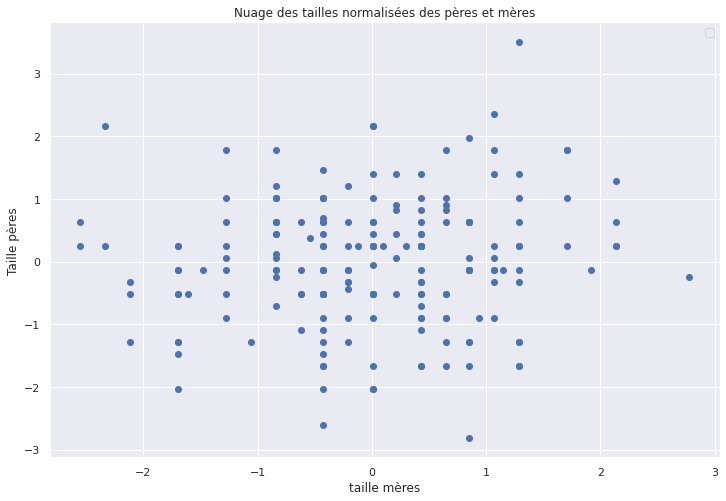

In [ ]:
## nuage taille père et mère
plt.figure(figsize = (12,8))
plt.scatter(x=DF["Mother"], y=DF["Father"])

plt.xlabel("taille mères")
plt.ylabel("Taille pères")
plt.legend()
plt.title("Nuage des tailles normalisées des pères et mères")
plt.show()

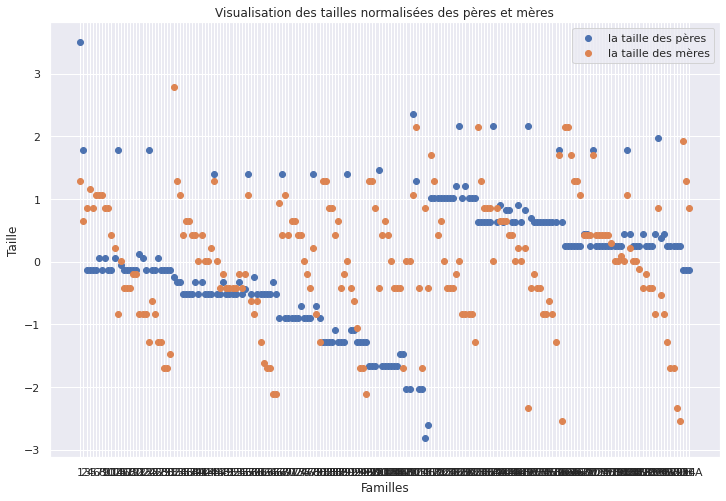

In [ ]:
### Deux nuages
plt.figure(figsize = (12,8))
plt.scatter(x=DF["Family"], y=DF["Father"], label="la taille des pères")
plt.scatter(DF["Family"], DF["Mother"], label="la taille des mères")
plt.xlabel("Familles")
plt.ylabel("Taille")
plt.legend()
plt.title("Visualisation des tailles normalisées des pères et mères")
plt.show()

### on voit que les densité des tailles normalisée est assez "proches".

# 6. Afficher un histogramme et un bloxplot du nombre d’enfants par famille.

# Histogramme :

il y'a 197 familles


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


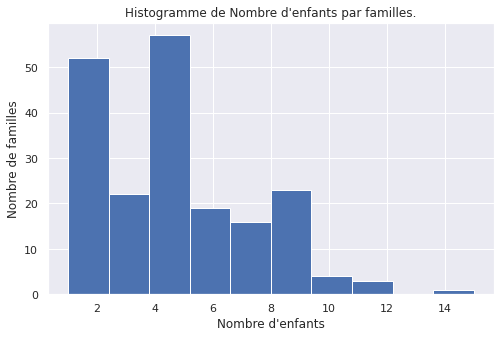

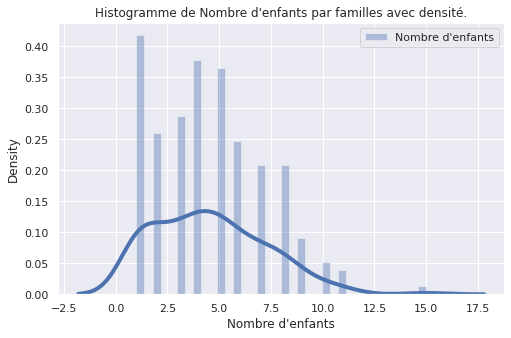

In [ ]:
df_dup=df.drop_duplicates(subset=['Family'],keep="first")
print("il y'a {} familles".format(len(df['Family'].unique())))
fig , ax = plt . subplots ( figsize =(8 , 5) )
ax . hist ( df_dup["Kids"])                     ## on utilise la dataFrame Dupliquée pour éviter une répition de nombre de "Kids".
plt.xlabel("Nombre d'enfants")
plt.ylabel("Nombre de familles")
plt.title("Histogramme de Nombre d'enfants par familles.")
fig . show ()
plt.figure(figsize=[8,5])
sns.distplot(DF["Kids"], hist=True, kde=True, bins=int(180/5),kde_kws={'linewidth': 4}, label="Nombre d'enfants")
plt.title("Histogramme de Nombre d'enfants par familles avec densité.")
plt.xlabel("Nombre d'enfants")
plt.legend()
plt.show()

# 7. Créer une colonne supplémentaire appelée ’Mean_Parents’ qui contient la transformation des données (’Father’+1.08* ’Mother ’)/2.

In [ ]:
df = round(df.assign(Mean_Parents = (df['Father']+(df['Mother']*1.08))/2), 1) ## On crée la nouvelle colonne dans df et on l'arrondit au premier chiffre après la virgule.
df.head()

,Family,Father,Mother,Gender,Height,Kids,Mean_Parents
0,1,199.4,170.2,M,185.9,4,191.6
1,1,199.4,170.2,F,175.8,4,191.6
2,1,199.4,170.2,F,175.3,4,191.6
3,1,199.4,170.2,F,175.3,4,191.6
4,2,191.8,168.9,M,186.7,4,187.1


In [ ]:
Ratio = np.mean(df['Father']) / np.mean(df['Mother'])
Ratio

1.0803096278104085

# 8. Régresser la taille d’un enfant par rapport à la transformation des données ’Mean_Parents’.

### On fait une régression linéaire simple avec une seule variable explicative  $x$ qui est la colonne "Mean_Parents". Avec $y$ est la colonne "Height", varaiable expliquée.

$\beta \in \mathbb{R}$,  et   $\epsilon \in \mathbb{R}^{len(df["Height"])}$

In [ ]:
len(df["Height"])

898

In [ ]:
x= np.array(df["Mean_Parents"]).reshape(-1,1)
y=np.array(df["Height"]).reshape(-1,1)
Height_predict1=np.dot(x,OLS (x ,y, option="non - normalise")[0] )+ OLS (x ,y, option="non - normalise")[1]
# print("Beta=", OLS (x ,y, option="non - normalise" )[0] )
# print("Epsilon=",OLS (x ,y, option="non - normalise")[1])

# 9. Afficher la taille d’un enfant et les données ’Mean_Parents’ comme un nuage de points et la droite de prédiction. Commenter.

## Avant de faire la régression je vais faire une prédiction de droite de régression par Scikit-Learn en un premier temps et puis comparer les résultats à notre modèle de régression linéaire faite par OLS.

In [ ]:
pip install scikit-learn

In [ ]:
import sklearn
from sklearn import linear_model
reg = linear_model.LinearRegression()

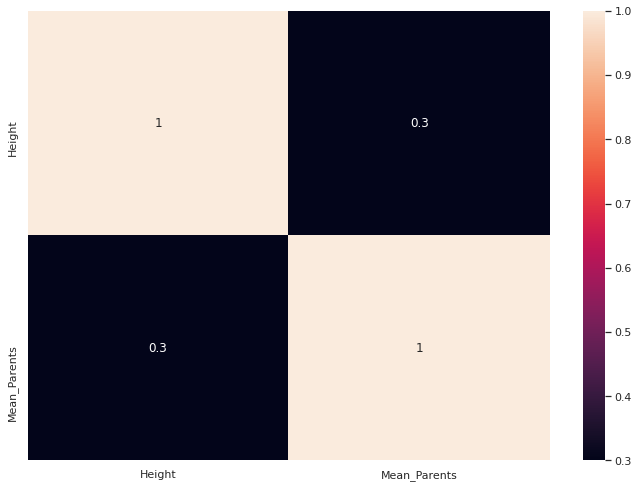

In [ ]:
## We visualise the correlation Matrix of 'Kids' and 'Mean_Parennts'.
df_1= df[['Height', 'Mean_Parents']]
matrice_corr = df_1.corr().round(1)  ## On crée une matrice de corrélation
sns.heatmap(data=matrice_corr, annot=True)

In [ ]:
X= df['Mean_Parents']
Y=df['Height']

from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

X_train=np.array(X_train).reshape(-1, 1)
Y_train=np.array(Y_train).reshape(-1, 1)
X_test=np.array(X_test).reshape(-1, 1)
Y_test=np.array(Y_test).reshape(-1, 1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(718, 1)
(180, 1)
(718, 1)
(180, 1)


In [ ]:
## We train our model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Now that we trained our Model, we evaluate our model with the linear regression.

In [ ]:
# Evaluating the training set
from sklearn.metrics import r2_score
y_train_predict = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))  ## we calculate the relative Mean Square Error
r2 = r2_score(Y_train, y_train_predict)

print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')

# model evaluation for testing set
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))


La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 8.581083174995207
le score R2 est 0.12102507548205088


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 8.691997027276923
le score R2 est 0.03169285915122666


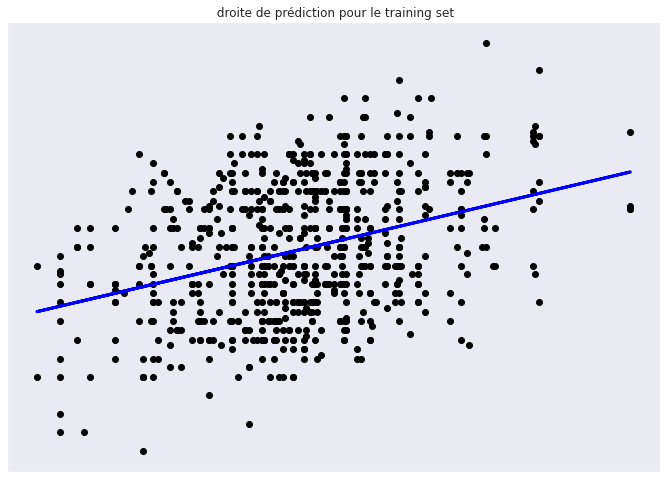

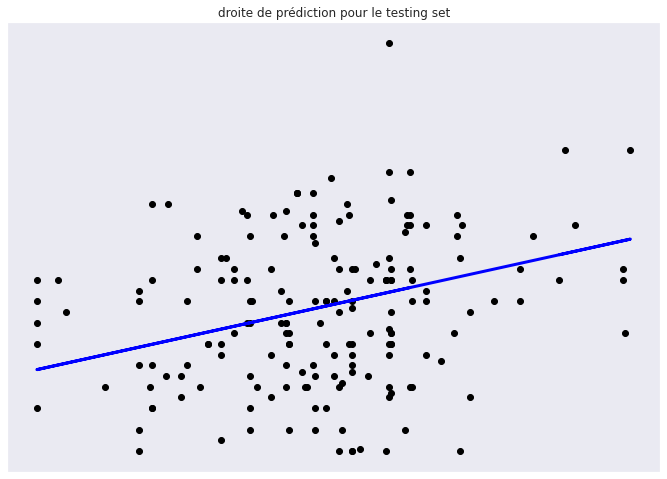

In [ ]:
# Plot outputs
plt.scatter(X_train, Y_train,  color='black')
plt.plot(X_train, y_train_predict, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.title(" droite de prédiction pour le training set")
plt.show()

plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, y_test_predict, color='blue', linewidth=3)
plt.title("droite de prédiction pour le testing set")
plt.xticks(())
plt.yticks(())

plt.show()

## Maintenant, faisant la régression demandée:

### régression par $OLS$:

coefficients de régression : [0.96412921]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


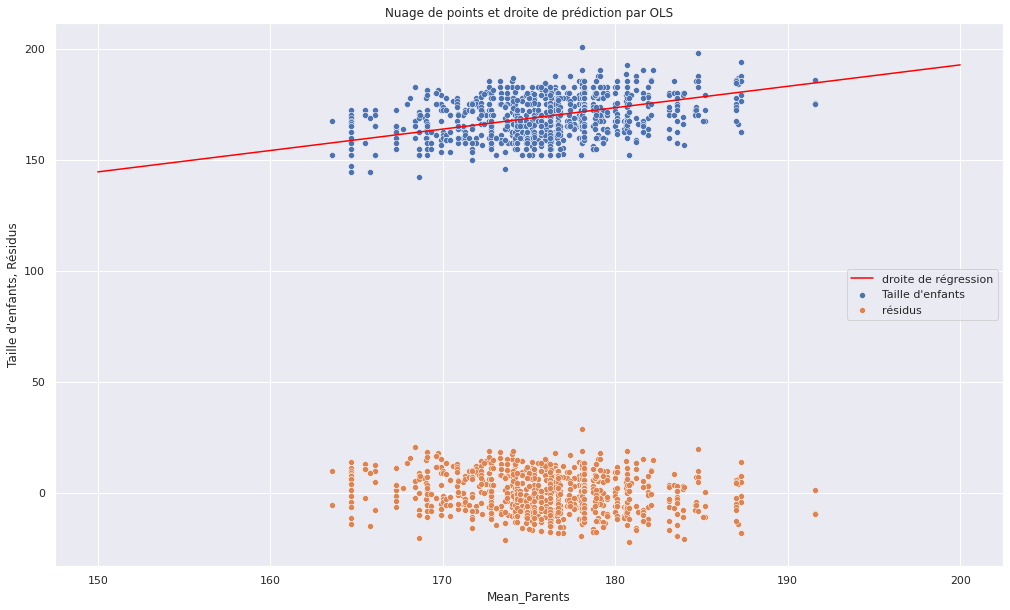

In [ ]:
x1= np.array(df["Mean_Parents"]).reshape(-1,1)
y1=np.array(df["Height"]).reshape(-1,1)
epsilon1=OLS(x1,y1,option ="non - normalise")[1]
beta1=OLS(x1,y1,option ="non - normalise")[0]
Height_predict1=np.dot(x1, OLS(x1,y1, option ="non - normalise")[0] )+ OLS(x1,y1, option ="non - normalise")[1]
print("coefficients de régression :", beta1)

p=np.linspace(150, 200, num=50, endpoint=True)
sns.set(rc={'figure.figsize':(17,10)})
sns.scatterplot(df["Mean_Parents"],df["Height"],label="Taille d'enfants")
sns.scatterplot(np.array(df['Mean_Parents']),y=epsilon1,label="résidus")
plt.plot(p, beta1[0]*p, color="red", label="droite de régression")
plt.title("Nuage de points et droite de prédiction par OLS")
plt.xlabel("Mean_Parents")
plt.ylabel("Taille d'enfants, Résidus")
plt.legend(loc='center right')
plt.show()

### Vérification par sns.regplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


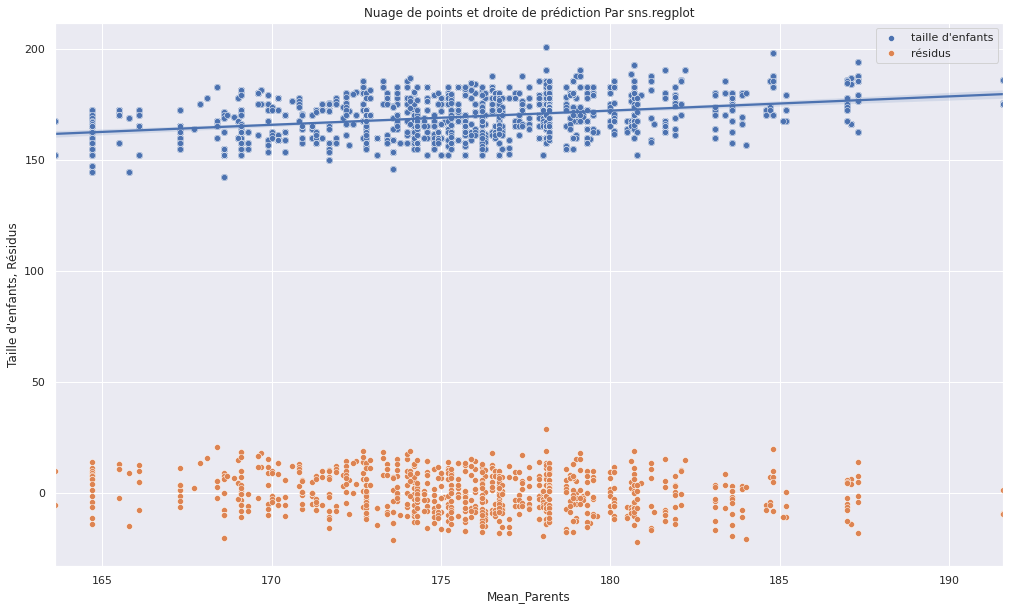

In [ ]:
##régresion automatisé par seaborn
sns.regplot(np.array(df['Mean_Parents']), y=np.array(df["Height"]), fit_reg=True)                       ## vérification : droite de prédictio en bleu
sns.scatterplot(x=np.array(df["Mean_Parents"]),y=np.array(df["Height"]),label="taille d'enfants")
sns.scatterplot(np.array(df['Mean_Parents']),y=epsilon1,label="résidus")
plt.title('Nuage de points et droite de prédiction Par sns.regplot')
plt.xlabel("Mean_Parents")
plt.ylabel("Taille d'enfants, Résidus")
plt.legend()
plt.show()

### La prédiction de droite de régression faite par Scikit-Learn va avec le résultat de régression simple qui sont encore confirmé par sns.regplot.

# 10. Afficher de plus sur la même figure, les résidus en fonction de ’Mean_Parents’ commeun nuage de points.

### Voir la réponse de la question 9.

# 11. L’hypothèse de normalité des résidus est-elle justifiée ? On pourra en plus de la figure précédente, afficher un histogramme et un qq-plot.

### les résidus suivent une loi (quasi) normale. donc L’hypothèse de normalité des résidus est justifiée.

### Histogramme de résidus

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


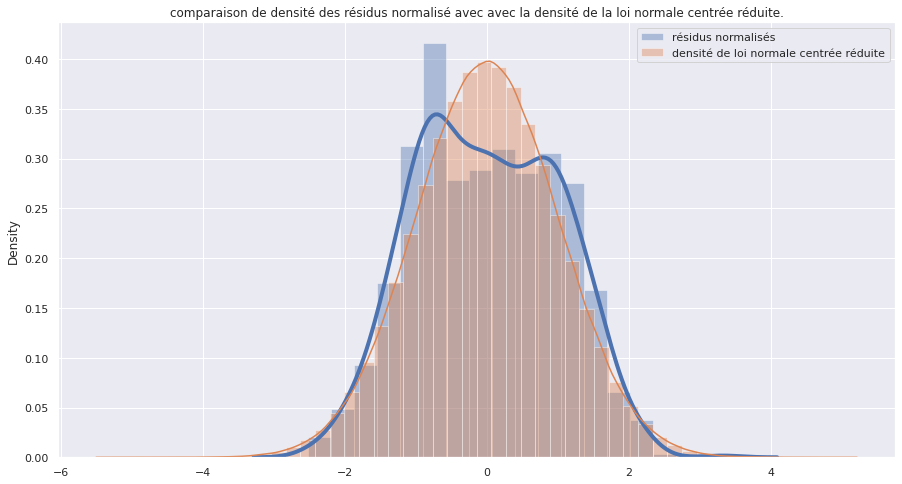

In [ ]:
x1= np.array(df["Mean_Parents"]).reshape(-1,1)
y1=np.array(df["Height"]).reshape(-1,1)
epsilon1=OLS(x1,y1,option ="non - normalise")[1]

plt.figure(figsize=[15,8])
sns.distplot(normalize(epsilon1), hist=True, kde=True,kde_kws={'linewidth': 4}, label="résidus normalisés")


data = np.random.randn(1000000)
sns.distplot(data, label="densité de loi normale centrée réduite")
plt.title("comparaison de densité des résidus normalisé avec avec la densité de la loi normale centrée réduite.")
plt.legend()
plt.show()


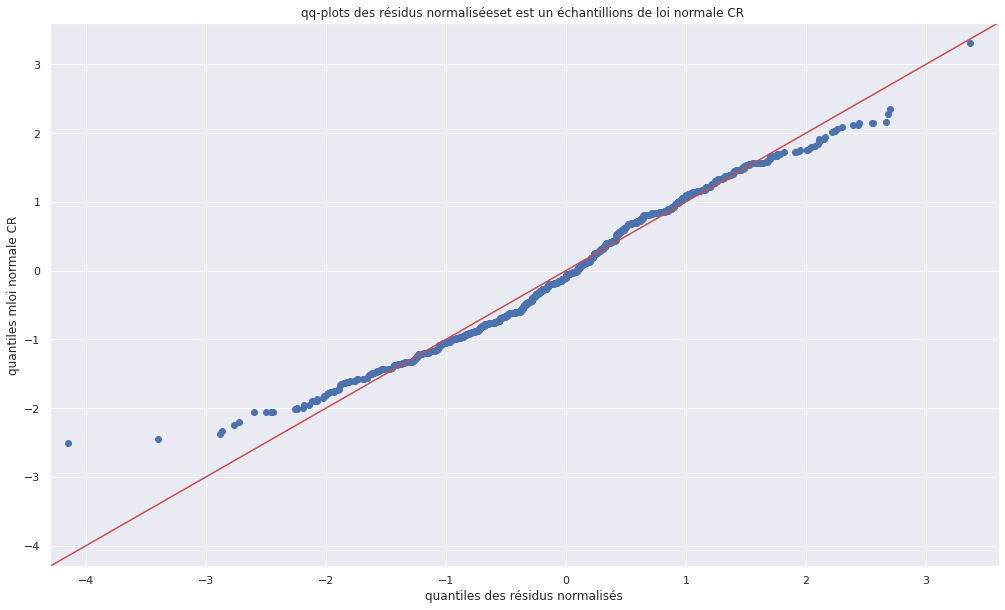

In [ ]:
data = np.random.randn(epsilon1.size)
pp_x = sm.ProbPlot (normalize(epsilon1))
pp_y = sm.ProbPlot (data )
fig = sm.qqplot_2samples (pp_x, pp_y, line='45')
plt.xlabel('quantiles des résidus normalisés')
plt.ylabel("quantiles mloi normale CR")


plt.title('qq-plots des résidus normaliséeset est un échantillions de loi normale CR ')
fig.show ()

Maintenant, on considère la matrice x de dimension n×2, où n est le nombre d’observation
et où pour tout i ∈ {1, . . . , n}, $x_{i,1}$ = 1 et la seconde colonne est constituée des données
’Mean_Parents’. On dit que on a ajouté une ordonnée ou un intercept (en anglais).


# 12. Justifier pourquoi il est intéressant de considérer cette nouvelle matrice et donner le modèle associé.

### il est intéressant de considérer cette matrice car il augmente les nombre des facteurs de régression. en parficulier, cette matrice nous permet de trouver $\beta_0$ coefficient dans l'équation $Y_i =\beta_0+ \sum_{j=1}^d \beta_j x_i^{(j)} +\epsilon_i.$

### le modèle associée:
$$Y_i = \beta_1 + \beta_2 x_i^{(2)}+ \epsilon_i$$
la matrice $x$ a sa première colonne contenant que les valeurs 1.

#13. Effectuer une régression de la taille d’un enfant par rapport à cette nouvelle matrice.

### d'après la figure ci-dessous, les tailles sont plus proches à la droite de régréssion. donc on obtient une régression meilleur que la régression faite par rapport un seule variable "Mean_Parents"

coefficients de régression : [57.06499884  0.63982736]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


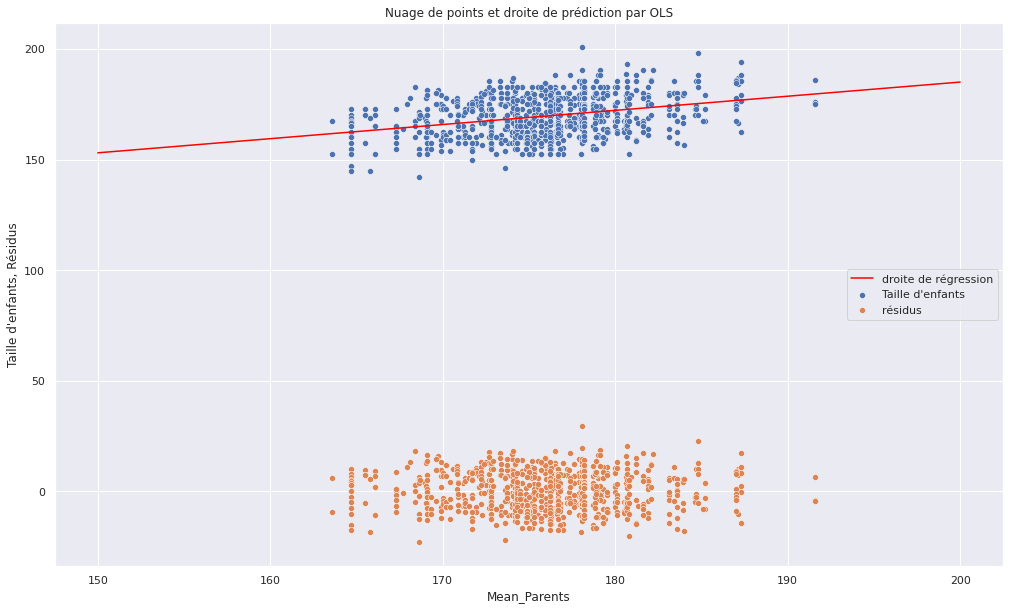

In [ ]:
X2=np.array([np.ones_like(df["Mean_Parents"]), df["Mean_Parents"]]).T
y2=np.array(df["Height"]).reshape(-1,1)
epsilon2=OLS(X2,y2,option ="non - normalise")[1]
beta2=OLS(X2, y2,option ="non - normalise")[0]
Height_predict2=np.dot(X2, OLS(X2,y2, option ="non - normalise")[0] )+ OLS(X2,y2, option ="non - normalise")[1]
print("coefficients de régression :", beta2)
p=np.linspace(150, 200, num=50, endpoint=True)

sns.scatterplot(X2[:,1],df["Height"],label="Taille d'enfants")
sns.scatterplot(np.array(X2[:,1]),y=epsilon2,label="résidus")
plt.plot(p, beta2[0]+beta2[1]*p, color="red", label="droite de régression")
plt.title("Nuage de points et droite de prédiction par OLS")
plt.xlabel("Mean_Parents")
plt.ylabel("Taille d'enfants, Résidus")
plt.legend(loc='center right')
plt.show()# 13. Effectuer une régression de la taille d’un enfant par rapport à cette nouvelle matrice.


# 14. Afficher la taille d’un enfant et les données ’Mean_Parents’ comme un nuage de points et la droite de prédiction. Commenter.

### Voir la figure de la réponse 13.

### d'après la figure ci-dessus, les tailles sont plus proches à la droite de régréssion. donc on obtient une régression meilleur que la régression faite par rapport un seule variable "Mean_Parents", Les données sont mieux régressées comme prévu.

# 15. Afficher de plus sur la même figure, les résidus en fonction de ’Mean_Parents’ comme un nuage de points.


### voir la figure de réponse 13. les résidus sont devenus plus petits et cela est due à la contribution du deuxième colonne de la matrice qui contient que la valeur 1 dans toutes ses entrées à la régression.

# 16. L’hypothèse de normalité des résidus est-elle justifiée ? On pourra en plus de la figure précédente, afficher un histogramme et un qq-plot.


### les résidus suivent une loi (quasi) normale. donc L’hypothèse de normalité des résidus est justifiée. et cette hypothèse est "plus" acceptable dans cette régression.

### Histogramme résidus

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


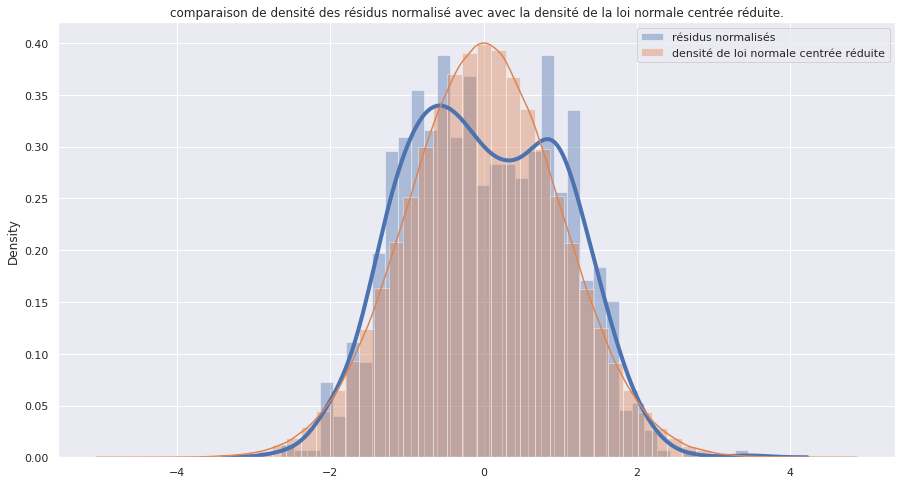

In [ ]:

plt.figure(figsize=[15,8])
sns.distplot(normalize(epsilon2), hist=True, kde=True, bins=int(180/5),kde_kws={'linewidth': 4}, label="résidus normalisés")

data = np.random.randn(1000000)
sns.distplot(data, label="densité de loi normale centrée réduite")
plt.title("comparaison de densité des résidus normalisé avec avec la densité de la loi normale centrée réduite.")
plt.legend()
plt.show()


### qq-plot

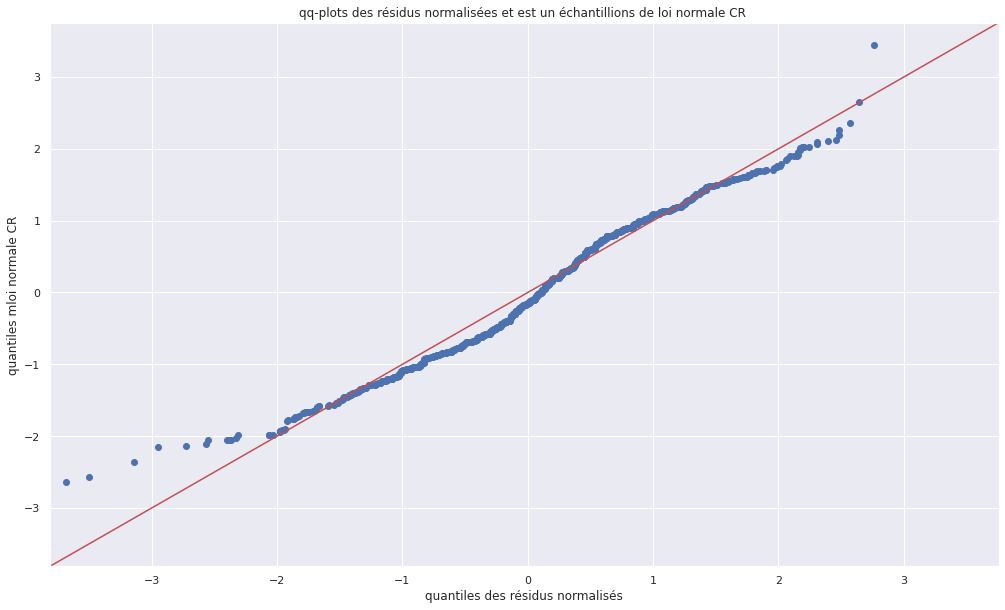

In [ ]:
data = np.random.randn(epsilon2.size)
pp_x = sm.ProbPlot (normalize(epsilon2))
pp_y = sm.ProbPlot (data )
fig = sm.qqplot_2samples (pp_x, pp_y, line='45')
plt.xlabel('quantiles des résidus normalisés')
plt.ylabel("quantiles mloi normale CR")


plt.title('qq-plots des résidus normalisées et est un échantillions de loi normale CR ')
fig.show ()

# 17. Comparer la norme du vecteur des résidus par rapport à celle du vecteur des résidus où on a juste pris en compte les données ’Mean_Parents’. Commenter.

### la norme du nouvel vecteur résidus est bien inférieure à celui du prémier , ce qui est prévu car la deuxième régression est plus optimale.

In [ ]:
np.linalg.norm(epsilon1),np.linalg.norm(epsilon2)

(261.62210024865294, 257.73373105326345)

On veut régresser les données ’Mean_Parents’ en fonction de la taille des enfants.

# 18. Effectuer une régression des données ’Mean_Parents’ en fonction de la taille des enfants et d’un offset. On note $α_1, α_2$, les coefficients de régression obtenus.


coefficients de régression : [147.81452318   0.16527736]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


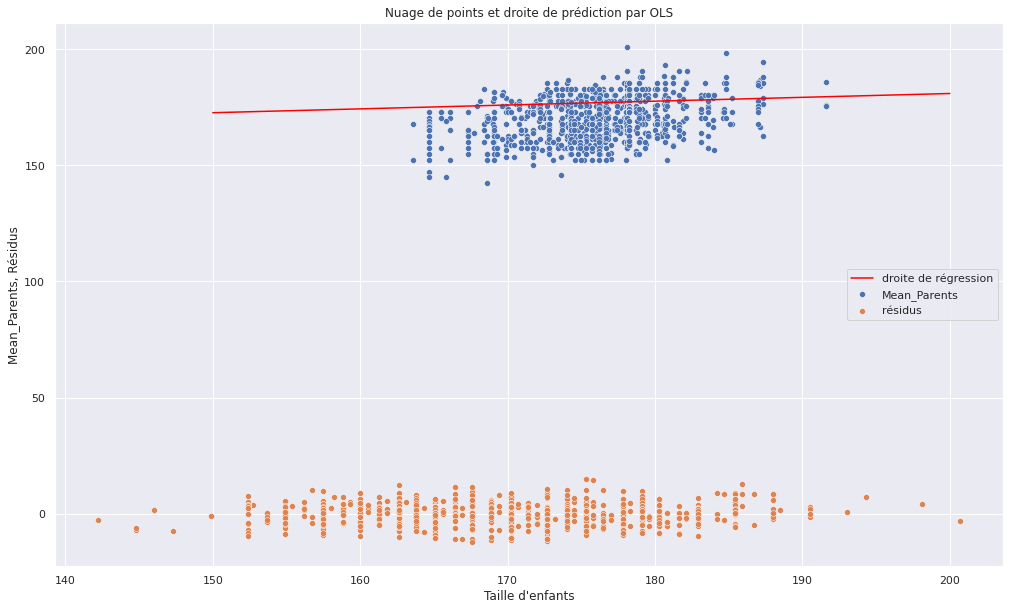

In [ ]:
X3=np.array([np.ones_like(df["Height"]), df["Height"]]).T
y3=np.array(df["Mean_Parents"]).reshape(-1,1)
epsilon3=OLS(X3,y3,option ="non - normalise")[1]
beta3=OLS(X3, y3,option ="non - normalise")[0]
Height_predict3=np.dot(X3, OLS(X3,y3, option ="non - normalise")[0] )+ OLS(X3,y3, option ="non - normalise")[1]
print("coefficients de régression :", beta3)

p=np.linspace(150, 200, num=50, endpoint=True)
sns.set(rc={'figure.figsize':(17,10)})
sns.scatterplot(X2[:,1],df["Height"],label="Mean_Parents")
sns.scatterplot(np.array(X3[:,1]),y=epsilon3,label="résidus")
plt.plot(p, beta3[0]+beta3[1]*p, color="red", label="droite de régression")
plt.title("Nuage de points et droite de prédiction par OLS")
plt.ylabel("Mean_Parents, Résidus")
plt.xlabel("Taille d'enfants")
plt.legend(loc='center right')
plt.show()



# 19. On note $β_1, β_2$ les coefficients de régression de la taille des enfants en fonction desdonnées ’Mean_Parents’ et d’un offset. Notons aussi $\bar{x}_n, \sigma_n^x$ la moyenne et la variance des données ’Mean_Parents’ et $\bar{y}_{n}, σ_n^y$ la moyenne et la variance des tailles des enfants. Vérifier numériquement que

**$$ α_1 = \bar{x}_{n} + \frac{\bar{y}_n}{ \bar{x}_{n}}\frac{σ_n^x}{σ_n^y}(β1 - \bar{y}_n).$$**

**$$ α_2 = \frac{σ_n^x}{σ_n^y}β2 .$$**

In [ ]:
## coeff de régression alpha
alpha1=beta3[0]
alpha2=beta3[1]


### la taille des enfants en fonction desdonnées ’Mean_Parents’ et d’un offset
X2=np.array([np.ones_like(df["Mean_Parents"]), df["Mean_Parents"]]).T
y2=np.array(df["Height"]).reshape(-1,1)
epsilon2=OLS(X2,y2,option ="non - normalise")[1]
beta2=OLS(X2, y2,option ="non - normalise")[0]
#######
def Mean(X):
   return np.mean(np.array(X))
def std(X):
  if (np.array(X).size)==1:
    print("non définie")
  else:
    D=(1/((np.array(X).shape[0])-1))*(np.array(X).shape[0])*(Mean((np.array(X)-Mean(X))**2))
  return D

x=df["Mean_Parents"]
y=df["Height"]
gama1= Mean(x) + (Mean(y)/Mean(x))*(std(x)/std(y))*(beta2[0]- Mean(y))
gama2= (std(x)/std(y))*beta2[1]

### vérification
print("alpha1 =", alpha1, "et gama1=", gama1)
print('Verification =' +
      '  {}'.format(np.isclose(alpha1, gama1)))

print("alpha2 =", alpha2, "et gama2=", gama2)
print('Verification =' +
      '  {}'.format(np.isclose(alpha2, gama2)))

alpha1 = 147.81452317659821 et gama1= 147.81452317659262
Verification =  True
alpha2 = 0.16527736182151326 et gama2= 0.16527736182152358
Verification =  True


# 20. (Optionnel) Montrer (4).


### On considère maintenant toutes les données, c’est-à-dire on considère x de dimension
n×3, où n est le nombre d’observation et où pour tout i ∈ {1, . . . , n}, $x_{i,1}$ = 1 et la seconde
et troisième colonne sont constituées respectivement des données des tailles de la mère et
du père de l’enfant.

## 21. Effectuer une régression de la taille d’un enfant par rapport à cette nouvelle matrice $x$.

coefficients de régression : [56.64454111  0.38011427  0.28311197]


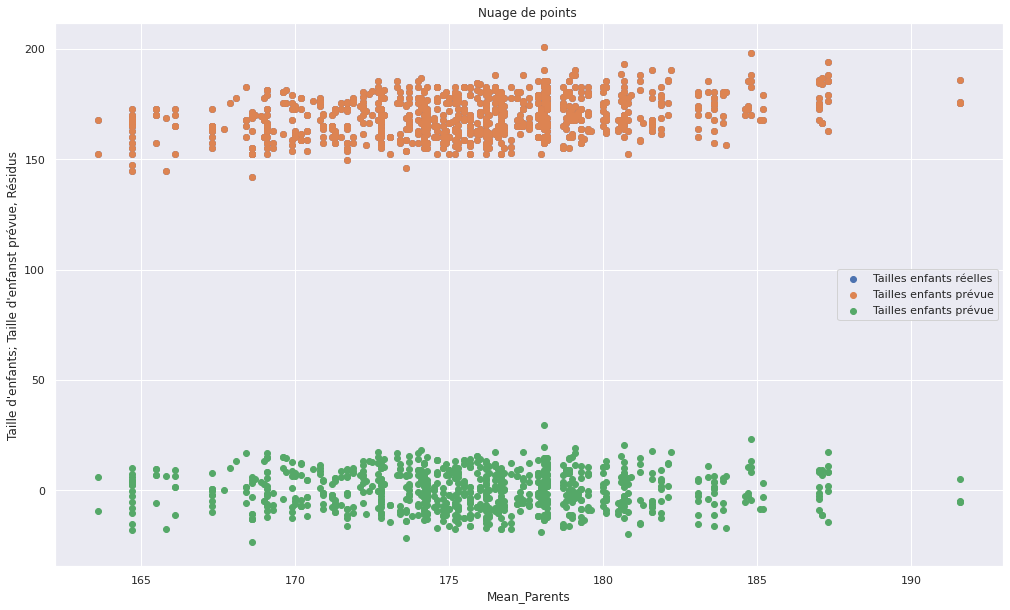

In [ ]:
X4=np.array([np.ones_like(df["Father"]), df["Father"], df["Mother"]]).T
y4=np.array(df["Height"]).reshape(-1,1)
epsilon4=OLS(X4,y4,option ="non - normalise")[1]             ###résidus
beta4=OLS(X4, y4,option ="non - normalise")[0]              ### coeff de régression
Height_predict4=np.dot(X4, OLS(X4,y4, option ="non - normalise")[0] )+ OLS(X4,y4, option ="non - normalise")[1]
print("coefficients de régression :", beta4)

sns.set(rc={'figure.figsize':(17,10)})
plt.scatter(x=df["Mean_Parents"], y=df["Height"], label= "Tailles enfants réelles")
plt.scatter(x=df["Mean_Parents"], y=Height_predict4, label= "Tailles enfants prévue")
plt.scatter(x=df["Mean_Parents"], y=epsilon4, label= "Tailles enfants prévue")

plt.title("Nuage de points ")
plt.xlabel("Mean_Parents")
plt.ylabel("Taille d'enfants; Taille d'enfanst prévue, Résidus")
plt.legend(loc='center right')
plt.show()



# 22. Afficher la taille d’un enfant et les données ’Mean_Parents’ comme un nuage de points et les tailles prédites par la régression en fonction des données ’Mean_Parents'. Commenter.


- Voir 21.
- la taille d'enfants réelles et la taille prévu coincident, donc la régression est parfaite.
- les nuages de résidus sont plus concentrées autour de zéros.

# 23. Afficher de plus sur la même figure, les résidus en fonction de ’Mean_Parents’ commeun nuage de points.


- Voir 21.

# 24. L’hypothèse de normalité des résidus est-elle justifiée ? On pourra en plus de la figure précédente, afficher un histogramme et un qq-plot.

### Histogramme

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


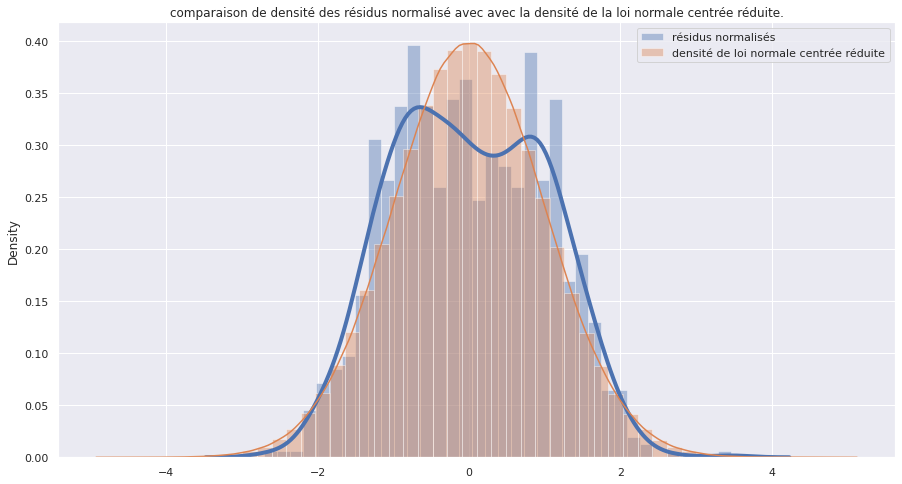

In [ ]:

plt.figure(figsize=[15,8])
sns.distplot(normalize(epsilon4), hist=True, kde=True, bins=int(180/5),kde_kws={'linewidth': 4}, label="résidus normalisés")

data = np.random.randn(1000000)
sns.distplot(data, label="densité de loi normale centrée réduite")
plt.title("comparaison de densité des résidus normalisé avec avec la densité de la loi normale centrée réduite.")
plt.legend()
plt.show()


### qq-plot

### les quantiles sont quasiment identiques dans la plupart des régions de graphe. Donc la normalité  des résidus est justifiée

<Figure size 1080x576 with 0 Axes>

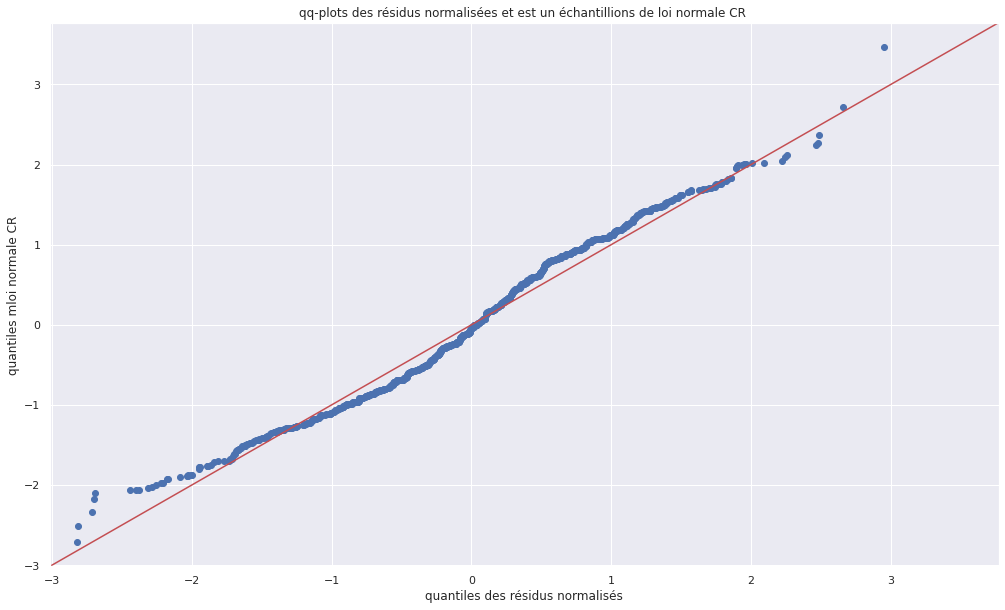

In [ ]:
plt.figure(figsize=[15,8])
data = np.random.randn(epsilon4.size)
pp_x = sm.ProbPlot (normalize(epsilon4))
pp_y = sm.ProbPlot (data )
fig = sm.qqplot_2samples (pp_x, pp_y, line='45')
plt.xlabel('quantiles des résidus normalisés')
plt.ylabel("quantiles mloi normale CR")


plt.title('qq-plots des résidus normalisées et est un échantillions de loi normale CR ')
fig.show ()

# 25. Comparer vos résultats avec les résultats de la régression où seul les données ’Mean_Parents’ et un offset sont utilisés. Commenter.


#2.3 Consommation de voitures
On s’intéresse dans cette partie à l’analyse d’un fichier de donnée aa qui contient la
consommation de différentes voitures et différentes de leurs caractéristiques. On souhaite
réaliser une régression de la consommation des voitures observées $(yi)_{i∈{1,...,N}}$ suivant leurs
caractéristiques x.


# 1. Télécharger les fichiers auto-mpg.data-original et auto-mpg.names sur le moodle du cours. Le fichier auto-mpg.data-original contient les données et auto-mpg names une description de ces dernières.


In [ ]:
### il faut importier le fichier "auto-mpg.data-original" qui se trouve sur  Moodle

from google.colab import files
uploaded = files.upload()

Saving auto-mpg.data-original_ to auto-mpg.data-original_


# 2. Charger les données avec Pandas. Ensuite, on ajoutera le nom des colonnes avec l’attribut name de read_cvs. On pourra regarder l’intérêt de l’option sep=r"\s+" si besoin.

In [ ]:
pd.options.display.float_format = '{:,.0f}'.format
u_cols = ['mpg', 'cylinders', 'displacement', 'horsepower',
          'weight', 'acceleration', 'model_year', 'origin', 'car_name']
data =pd.read_csv('auto-mpg.data-original_', names=u_cols, sep=r"\s+", na_values='NA')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18,8,307,130,"3,504",12,70,1,chevrolet chevelle malibu
1,15,8,350,165,"3,693",12,70,1,buick skylark 320
2,18,8,318,150,"3,436",11,70,1,plymouth satellite
3,16,8,304,150,"3,433",12,70,1,amc rebel sst
4,17,8,302,140,"3,449",10,70,1,ford torino


# 3. Rajouter un intercept aux données, i.e. une colonne de 1.


In [ ]:
dataf= pd.DataFrame({'intercept':1, 'mpg':data["mpg"], 'cylinders':data['cylinders'], "displacement": data["displacement"], "horsepower": data["horsepower"],
                     "weight": data["weight"], "acceleration": data["acceleration"], "model_year": data["model_year"], "origin": data["origin"], "car_name": data["car_name"]})
dataf .head()


,intercept,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,1,18,8,307,130,"3,504",12,70,1,chevrolet chevelle malibu
1,1,15,8,350,165,"3,693",12,70,1,buick skylark 320
2,1,18,8,318,150,"3,436",11,70,1,plymouth satellite
3,1,16,8,304,150,"3,433",12,70,1,amc rebel sst
4,1,17,8,302,140,"3,449",10,70,1,ford torino


# 4. Décriver les caractéristiques des voitures observées qui sont à votre disposition à partir du fichier auto-mpg.names. Lesquelles de ces caractéristiques sont pertinentes selon vous pour l’étude de la consommation d’une voiture.

### les caractéréstqiques sont : ['intercept','mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'model_year', 'origin', 'car_name']

### caractéristiques pertinentes: toutes ces caractéristques sont utiles et pertinante pour faire une étude. Mais les plus communes dont les consommateurs donnet beacoups d'iportance à mon avis sont : 'horsepower','displacement', 'acceleration', 'model_year', "weight".


In [ ]:
caract = dataf.columns
caract

Index(['intercept', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

# 5. Y a-t-il des données manquantes ? On enlèvera les lignes où il manque des données si besoin.

### il y'a 14 données manquantes (NA)


In [ ]:
X = dataf.shape[0]

# Remove NA:
dataf = dataf.dropna(axis=0, how='any')
Y= dataf.shape[0]
data.head()

print("There are {} missing values (NA).".format(X - Y))

There are 14 missing values (NA).


# 6. Faites une regression de la consommation des voitures observées en fonction de leurs caractéristiques à l’exception des variables ’origin’ et ’car name’. On ajoutera un offset et on centrera et normalisera les données.


### Régression par $OLS$

In [ ]:
Z1= dataf.drop(['origin', 'car_name', 'mpg'], axis=1)
m1=normalize(np.array(dataf["mpg"]).reshape(-1,1))

Epsilon1=OLS(normalize(Z1), m1, option ="non - normalise")[1]
Beta1=OLS(normalize(Z1), m1, option ="non - normalise")[0]
mpg_predict1=np.dot(normalize(Z1), OLS(normalize(Z1), m1, option ="non - normalise")[0] )+OLS(normalize(Z1), m1, option ="non - normalise")[1]

print("Coefficients de régression :", Beta1)
dataf.head()

Coefficients de régression : [ 4.03540049e-16 -7.20906558e-02  1.02946946e-01 -1.93000840e-03
 -7.39443986e-01  3.01418419e-02  3.55567399e-01]


,intercept,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,1,18,8,307,130,"3,504",12,70,1,chevrolet chevelle malibu
1,1,15,8,350,165,"3,693",12,70,1,buick skylark 320
2,1,18,8,318,150,"3,436",11,70,1,plymouth satellite
3,1,16,8,304,150,"3,433",12,70,1,amc rebel sst
4,1,17,8,302,140,"3,449",10,70,1,ford torino


# 7. Commenter vos résultats. Par exemple, quelles sont les variables qui expliquent le mieux la consommation des voitures observées ? est-ce surprenant ?

### - Interprétation: Les deux variables qui semblent les plus explicative de la consomation (d'après l'amplitudes de leurs coefficients de régression) sont "model_year" qui a le coefficient de régression positif maximal et l"weight" qui a le coeff de régression négatif minimale. ce qui n'est pas surperenant vu que la plupart des gens préferent une voiture du dmodèle le plus récent et pas trés lourde.


---
- on voit une rélation linaire positive entre la consomattion et les variables : 'displacement','acceleration', 'model_year'.
-on voit une rélation linaire négative entre la consomattion et les variables : 'cylinders', 'horsepower', 'weight', 'acceleration'.


# 8. Prédire la consommation d’une voiture ayant les caractéristiques 1²suivantes. Par information, la consommation effectivement mesurée sur cette exemple était de 22 mpg.


In [ ]:
## on extraire une dataframe correspondante à mpg22 sans colonnes 'origin', 'car_name', 'mpg', 'intercept'
DF2=dataf.drop(['origin', 'car_name', 'intercept'], axis=1)

DF2=DF2[dataf["mpg"]==22]
DF2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
21,22,6,198,95,"2,833",16,70
53,22,4,140,72,"2,408",19,71
84,22,4,121,76,"2,511",18,72
87,22,4,122,86,"2,395",16,72
117,22,4,108,94,"2,379",16,73
186,22,4,121,98,"2,945",14,75
198,22,6,225,100,"3,233",15,76
199,22,6,250,105,"3,353",14,76
248,22,6,146,97,"2,815",14,77
397,22,6,232,112,"2,835",15,82


On considère maintenant le modèle suivant
$$Y_i = \beta_0 +\sum_{j=1} \beta_j x_i^{(j)} + \sum_{i , j=1 }^{d}\alpha_{i,j}x_i^{(j)} x_i^{(i)}$$
où les $(Y_i)_{i\in \{1,...,N\}}$ sont toujours les observations que l’on cherche à expliquer (ici la consommation de voitures) et les $(x_i^{(j)})_{i\in\{1,...,N\}, j\in\{1,...,d\}}$ dont les variables explicatives (ici les caractéristiques d’une voiture).

# 9. Justifier pourquoi ce modèle peut-être intéressant comparé au modèle (1). Selon vous, est-il toujours préférable d’utiliser le modèle (1) ou (5) ?

### d'après la matrice de corrélation ci dessus les colones de la matrice data ne sont pas indépendantes. Ce nouveaux modèle est plus intéressant car il met cette relation de corélation en compte, ce qui minimise la variance.

### Le modèle 5 est plus précis que le modèle 1 donc c'est toujours préférable de l'utiliser surtout quand on fait une étude par ordinateur.

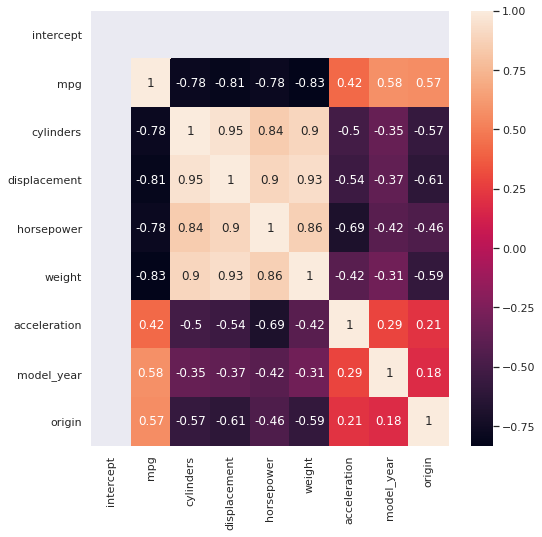

In [ ]:
corr_matrix=dataf.corr()
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(corr_matrix, annot=True)
plt.show()

d'après la matrice de corrélation ci dessus les colones de la matrice data ne sont pas indépendantes. Ce nouveaux modèle est plus intéressant car il met cette relation de corélation en compte, ce qui minimise la variance.

Le modèle 5 est plus précis que le modèle 1 donc c'est toujours préférable de l'utiliser surtout quand fait une étude par ordinateur.

# 10. Justifier que le modèle (5) revient en fait à un modèle de régression linéaire mais est associé à une matrice x˜ (calculable à partir de x) et des coefficients de regression β˜ que l’on précisera.


# 11. Faites une fonction qui renvoie la matrice x˜ à partir de $x$

# 13. Commenter vos résultats. Par exemple, quelles sont les variables qui expliquent le mieux la consommation des voitures observées ? est-ce surprenant ?

# 14. Comparer les résultats des deux régressions que vous avez faites. On pourra par exemple regarder la norme des résidus.


On revient au modèle (1).


# **15**. Proposer une manière d’intégrer l’origine des voitures dans la régression. Pour information, 1 = USA, 2 = Europe, 3 = Japon.


### On ajoute 3 colonnes, "USA", "Europe" et "Japon." de sorte que si l'origine de la voiture est USA on affcete 1 dans la nouvelle colonne "USA" et 0 dans  "Europe" et "Japon.". on procède de meme pour les origines "Europe" et "Japon."


On se propose d’intégrer l’origine des voitures de la manière suivante. Pour toute observation $y_i$, i ∈ {1, . . . , N} et d’origine x
origine
i ∈ {1, 2, 3}, on crée trois nouvelles variables
x
origine
i,j = 1{j}(x
origine) pour j ∈ {1, 2, 3}.



# 16. Ce choix est-il pertinent ou non ?

### ce choix permet d'associer l'originne de chaque voiture au variable x d'une manière bien définie et unique. il permet aussi  de comparer les critères de productions entre les différentes pays et donc servs à analyser le besoin des consomatteurs qui préférent un orgin de production.

## 17. Créer pour tout i ∈ {1, . . . , N}, calculer les trois nouvelles variables x origine i,j , j ∈{1, 2, 3}, et effectuer une régression des (yi)i∈{1,...,N} en fonction de ces nouvelles variables et des caractéristiques ’cylinders’, ’displacement’, ’horsepower’, ’weight’, ’acceleration’, ’model year’.


In [ ]:
##calcul des variables X ORIGINE
DF3=dataf
DF3['USA'] = np.where(DF3['origin']== 1, 1, 0)
DF3['Europe'] = np.where(DF3['origin']== 2, 1, 0)
DF3['Japon'] = np.where(DF3['origin']== 3, 1, 0)


##régression
Z3= DF3.drop(['origin', 'car_name', 'mpg'], axis=1)
m3=normalize(np.array(DF3["mpg"]).reshape(-1,1))

Epsilon3=OLS(normalize(Z3), m3, option ="non - normalise")[1]
Beta3=OLS(normalize(Z3), m3, option ="non - normalise")[0]
mpg_predict3=np.dot(normalize(Z3), OLS(normalize(Z3), m3, option ="non - normalise")[0] )+OLS(normalize(Z3), m3, option ="non - normalise")[1]

print("Coefficients de régression :", Beta3),
DF3.head()


Coefficients de régression : [ 5.34945352e-16 -1.01453196e-01  3.27735627e-01 -1.00951299e-01
 -7.27069383e-01  2.78732400e-02  3.64718217e-01  2.09273948e-01
  2.93215979e-01  3.22162800e-01]


,intercept,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,USA,Europe,Japon
0,1,18,8,307,130,"3,504",12,70,1,chevrolet chevelle malibu,1,0,0
1,1,15,8,350,165,"3,693",12,70,1,buick skylark 320,1,0,0
2,1,18,8,318,150,"3,436",11,70,1,plymouth satellite,1,0,0
3,1,16,8,304,150,"3,433",12,70,1,amc rebel sst,1,0,0
4,1,17,8,302,140,"3,449",10,70,1,ford torino,1,0,0


# *18*. Quelle origine explique le mieux les observations.


### l'origine qui origine explique le mieux les observations et celui qui a une valeur absolue de son coefficient de régresion maximale  donc le "Japon".